## Pandas

### Series

In [1]:
import pandas as pd
import numpy as np

In [2]:
ser = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
ser

a    1
b    2
c    3
dtype: int64

In [3]:
ser = pd.Series({'a': 1, 'b': 2, 'c': 3})
ser

a    1
b    2
c    3
dtype: int64

In [4]:
ser.index

Index(['a', 'b', 'c'], dtype='object')

In [5]:
ser.values

array([1, 2, 3], dtype=int64)

In [6]:
ser['a']

1

In [7]:
ser.iloc[0]

1

In [8]:
ser = ser.drop(['a', 'c'])
ser

b    2
dtype: int64

### DataFrame

In [9]:
df = pd.DataFrame([[1, 2, 3, 4], [5, 6, 7, 8]], columns=['col0', 'col1', 'col2', 'col3'], index=['idx0', 'idx1'])
df

,col0,col1,col2,col3
idx0,1,2,3,4
idx1,5,6,7,8


In [10]:
df = pd.DataFrame({'col0': [1, 5], 'col1': [2, 6], 'col2': [3, 7], 'col3': [4, 8]}, index=['idx0', 'idx1'])
df

,col0,col1,col2,col3
idx0,1,2,3,4
idx1,5,6,7,8


In [11]:
df.to_csv('dummy_data.csv')
pd.read_csv('dummy_data.csv', index_col=0, header=0)

,col0,col1,col2,col3
idx0,1,2,3,4
idx1,5,6,7,8


In [12]:
df.shape

(2, 4)

In [13]:
# add a new column
df['new_col'] = ['i0', 'i1']
df

,col0,col1,col2,col3,new_col
idx0,1,2,3,4,i0
idx1,5,6,7,8,i1


In [14]:
# add a new row
df.loc['idx2'] = [9, 10, 11, 12, 'i2']
df

,col0,col1,col2,col3,new_col
idx0,1,2,3,4,i0
idx1,5,6,7,8,i1
idx2,9,10,11,12,i2


In [15]:
# set a new index
df.set_index('new_col', inplace=True)
df

,col0,col1,col2,col3
new_col,,,,
i0,1,2,3,4
i1,5,6,7,8
i2,9,10,11,12


In [16]:
# remove index name
df.index.name = None
df

,col0,col1,col2,col3
i0,1,2,3,4
i1,5,6,7,8
i2,9,10,11,12


In [17]:
# drop a column, ['col1', 'col3'] for multiple columns, axis=0 for row
df = df.drop('col3', axis=1)
df

,col0,col1,col2
i0,1,2,3
i1,5,6,7
i2,9,10,11


### Selecting data

In [18]:
np.random.seed(0)
df = pd.DataFrame(np.random.randint(0, 10, (4, 6)), columns=['col0', 'col1', 'col2', 'col3', 'col4', 'col5'], index=['idx0', 'idx1', 'idx2', 'idx3'])
df

,col0,col1,col2,col3,col4,col5
idx0,5,0,3,3,7,9
idx1,3,5,2,4,7,6
idx2,8,8,1,6,7,7
idx3,8,1,5,9,8,9


In [19]:
# select a column
df['col1']
# df.loc[:, 'col1']
# df.iloc[:, 1]

idx0    0
idx1    5
idx2    8
idx3    1
Name: col1, dtype: int32

In [20]:
# select a row
df.loc['idx1']
# df.loc['idx1', :]
# df.iloc[1]

col0    3
col1    5
col2    2
col3    4
col4    7
col5    6
Name: idx1, dtype: int32

In [21]:
# select multiple columns
df[['col1', 'col3']]
# df.loc[:, ['col1', 'col3']]
# df.iloc[:, [1, 3]]

,col1,col3
idx0,0,3
idx1,5,4
idx2,8,6
idx3,1,9


In [22]:
# select multiple rows
df.loc[['idx1', 'idx3']]
# df.loc[['idx1', 'idx3'], :]
# df.iloc[[1, 3]]

,col0,col1,col2,col3,col4,col5
idx1,3,5,2,4,7,6
idx3,8,1,5,9,8,9


In [23]:
# select a cell
df.at['idx1', 'col1'] # faster than loc
# df.iat[1, 1]
# df.loc['idx1', 'col1']
# df.iloc[1, 1]

5

In [24]:
# set a cell value
df.at['idx1', 'col1'] = 100
# df.iat[1, 1] = 100
df

,col0,col1,col2,col3,col4,col5
idx0,5,0,3,3,7,9
idx1,3,100,2,4,7,6
idx2,8,8,1,6,7,7
idx3,8,1,5,9,8,9


In [25]:
# select by condition
df[df['col0'] >= 5]

,col0,col1,col2,col3,col4,col5
idx0,5,0,3,3,7,9
idx2,8,8,1,6,7,7
idx3,8,1,5,9,8,9


In [26]:
# select by multiple conditions
df[(df['col0'] >= 5) & (df['col2'] < 5)]

,col0,col1,col2,col3,col4,col5
idx0,5,0,3,3,7,9
idx2,8,8,1,6,7,7


In [27]:
# selct rows by column values
df[df['col1'].isin([100, 8])]

,col0,col1,col2,col3,col4,col5
idx1,3,100,2,4,7,6
idx2,8,8,1,6,7,7


In [28]:
# sort rows by column values
df.sort_values('col1', ascending=False)

,col0,col1,col2,col3,col4,col5
idx1,3,100,2,4,7,6
idx2,8,8,1,6,7,7
idx3,8,1,5,9,8,9
idx0,5,0,3,3,7,9


In [29]:
# sort columns by row values
df.sort_values('idx1', axis=1)

,col2,col0,col3,col5,col4,col1
idx0,3,5,3,9,7,0
idx1,2,3,4,6,7,100
idx2,1,8,6,7,7,8
idx3,5,8,9,9,8,1


In [30]:
# sort by index
df.sort_index(ascending=False)

,col0,col1,col2,col3,col4,col5
idx3,8,1,5,9,8,9
idx2,8,8,1,6,7,7
idx1,3,100,2,4,7,6
idx0,5,0,3,3,7,9


### Descriptive statistics

In [31]:
df.describe()

,col0,col1,col2,col3,col4,col5
count,4.00000,4.000000,4.000000,4.000000,4.00,4.00
mean,6.00000,27.250000,2.750000,5.500000,7.25,7.75
std,2.44949,48.630409,1.707825,2.645751,0.50,1.50
min,3.00000,0.000000,1.000000,3.000000,7.00,6.00
25%,4.50000,0.750000,1.750000,3.750000,7.00,6.75
50%,6.50000,4.500000,2.500000,5.000000,7.00,8.00
75%,8.00000,31.000000,3.500000,6.750000,7.25,9.00
max,8.00000,100.000000,5.000000,9.000000,8.00,9.00


In [32]:
# min of each column, axis=1 for row
df.min()

col0    3
col1    0
col2    1
col3    3
col4    7
col5    6
dtype: int32

In [33]:
# index of min of each column
df.idxmin()

col0    idx1
col1    idx0
col2    idx2
col3    idx0
col4    idx0
col5    idx1
dtype: object

In [34]:
df['col5'].value_counts()

9    2
6    1
7    1
Name: col5, dtype: int64

### Missing values

In [35]:
df = pd.DataFrame({'col0': [1, 2, np.nan, 4],
                   'col1': [5, 6, 7, 8],
                   'col2': [9, 10, 11, np.nan],
                   'col3': [13, 14, 15, 16]},
                  index=['idx0', 'idx1', 'idx2', 'idx3'])
df

,col0,col1,col2,col3
idx0,1.0,5,9.0,13
idx1,2.0,6,10.0,14
idx2,NaN,7,11.0,15
idx3,4.0,8,NaN,16


In [36]:
df.isna().any()

col0     True
col1    False
col2     True
col3    False
dtype: bool

In [37]:
x, y = np.where(df.isna())
nan_indices = list(zip(x, y))
nan_indices

[(2, 0), (3, 2)]

In [38]:
# drop rows with NaN, axis=1 for columns
df.dropna()

,col0,col1,col2,col3
idx0,1.0,5,9.0,13
idx1,2.0,6,10.0,14


In [39]:
# forward/backward fill NaN
df.ffill()

,col0,col1,col2,col3
idx0,1.0,5,9.0,13
idx1,2.0,6,10.0,14
idx2,2.0,7,11.0,15
idx3,4.0,8,11.0,16


In [40]:
# fill NaN with a value
df.fillna(df.mean())

,col0,col1,col2,col3
idx0,1.000000,5,9.0,13
idx1,2.000000,6,10.0,14
idx2,2.333333,7,11.0,15
idx3,4.000000,8,10.0,16


In [41]:
# fill NaN with linear interpolated values
df.interpolate(method='linear')

,col0,col1,col2,col3
idx0,1.0,5,9.0,13
idx1,2.0,6,10.0,14
idx2,3.0,7,11.0,15
idx3,4.0,8,11.0,16


In [42]:
# fill NaN with a value based on column
df.fillna({'col0': 0, 'col2': 1})

,col0,col1,col2,col3
idx0,1.0,5,9.0,13
idx1,2.0,6,10.0,14
idx2,0.0,7,11.0,15
idx3,4.0,8,1.0,16


### Duplicated Values

In [43]:
df = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9], [4, 5, 6]], columns=['col0', 'col1', 'col2'], index=['idx0', 'idx1', 'idx2', 'idx3'])
df

,col0,col1,col2
idx0,1,2,3
idx1,4,5,6
idx2,7,8,9
idx3,4,5,6


In [44]:
df.duplicated()

idx0    False
idx1    False
idx2    False
idx3     True
dtype: bool

In [45]:
# drop duplicated rows
df.drop_duplicates(keep='first')

,col0,col1,col2
idx0,1,2,3
idx1,4,5,6
idx2,7,8,9


### Abnormal values

In [46]:
np.random.seed(0)
df = pd.DataFrame(np.random.randint(0, 10, (11, 3)), columns=['col0', 'col1', 'col2'])
df.iloc[7, 1] = 100
df

,col0,col1,col2
0,5,0,3
1,3,7,9
2,3,5,2
3,4,7,6
4,8,8,1
5,6,7,7
6,8,1,5
7,9,100,9
8,4,3,0
9,3,5,0


<Axes: >

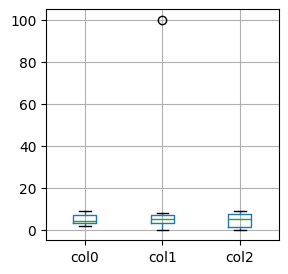

In [47]:
df.boxplot(figsize=(3, 3))

In [48]:
# Z-score Method
# define outlier as a value that is more than 3 standard deviations from the mean, or less than 3 standard deviations from the mean
mean_val = df['col1'].mean()
std_val = df['col1'].std()
outliers = df[(df['col1'] < mean_val - 3 * std_val) | (df['col1'] > mean_val + 3 * std_val)]
outliers

,col0,col1,col2
7,9,100,9


In [49]:
# remove outliers
df = df.drop(outliers.index)
df

,col0,col1,col2
0,5,0,3
1,3,7,9
2,3,5,2
3,4,7,6
4,8,8,1
5,6,7,7
6,8,1,5
8,4,3,0
9,3,5,0
10,2,3,8


In [50]:
# IQR Method
# define outlier as a value that is less than Q1 - 1.5 * IQR, or more than Q3 + 1.5 * IQR

np.random.seed(0)
df = pd.DataFrame(np.random.randint(0, 10, (11, 3)), columns=['col0', 'col1', 'col2'])
df.iloc[7, 1] = 100

Q1 = df['col1'].quantile(0.25)
Q3 = df['col1'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['col1'] < lower_bound) | (df['col1'] > upper_bound)]
outliers

,col0,col1,col2
7,9,100,9


In [51]:
# replace outliers with median
df['col1'] = np.where((df['col1'] < lower_bound) | (df['col1'] > upper_bound), df['col1'].median(), df['col1'])
df

,col0,col1,col2
0,5,0.0,3
1,3,7.0,9
2,3,5.0,2
3,4,7.0,6
4,8,8.0,1
5,6,7.0,7
6,8,1.0,5
7,9,5.0,9
8,4,3.0,0
9,3,5.0,0


### Combining DataFrames

In [52]:
# merge: combine two dataframes with the same columns

df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 'B': ['B0', 'B1', 'B2', 'B3'], 'key': ['K0', 'K1', 'K2', 'K3']})
df2 = pd.DataFrame({'C': ['C0', 'C1', 'C2'], 'D': ['D0', 'D1', 'D2'], 'key': ['K0', 'K1', 'K2']})
pd.merge(df1, df2, on='key', how='outer') # how='inner', 'left', 'right', 'outer' to specify use of keys

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2
3,A3,B3,K3,NaN,NaN


In [53]:
# join: combine two dataframes with different columns

df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'], 'B': ['B0', 'B1', 'B2'], 'key': ['K0', 'K1', 'K3']}, index=['K0', 'K1', 'K2'])
df2 = pd.DataFrame({'C': ['C0', 'C1', 'C2'], 'D': ['D0', 'D1', 'D2']}, index=['K0', 'K2', 'K3'])
df1.join(df2, how='inner')

,A,B,key,C,D
K0,A0,B0,K0,C0,D0
K2,A2,B2,K3,C1,D1


In [54]:
df1.join(df2, how='outer')

,A,B,key,C,D
K0,A0,B0,K0,C0,D0
K1,A1,B1,K1,NaN,NaN
K2,A2,B2,K3,C1,D1
K3,NaN,NaN,NaN,C2,D2


In [55]:
# specify key for join
df1.join(df2, on='key', how='inner')

,A,B,key,C,D
K0,A0,B0,K0,C0,D0
K2,A2,B2,K3,C2,D2


In [56]:
# concatenate: combine dataframes along axis

df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'], 'B': ['B0', 'B1', 'B2'], 'C': ['C0', 'C1', 'C2']}, index=['idx0', 'idx1', 'idx2'])
df2 = pd.DataFrame({'B': ['B0', 'B1', 'B2'], 'C': ['C0', 'C1', 'C2'], 'D': ['D0', 'D1', 'D2']}, index=['idx1', 'idx2', 'idx3'])
pd.concat([df1, df2], axis=0, join='outer') # vertical concatenation

,A,B,C,D
idx0,A0,B0,C0,NaN
idx1,A1,B1,C1,NaN
idx2,A2,B2,C2,NaN
idx1,NaN,B0,C0,D0
idx2,NaN,B1,C1,D1
idx3,NaN,B2,C2,D2


In [57]:
pd.concat([df1, df2], axis=1, join='outer') # horizontal concatenation

,A,B,C,B,C,D
idx0,A0,B0,C0,NaN,NaN,NaN
idx1,A1,B1,C1,B0,C0,D0
idx2,A2,B2,C2,B1,C1,D1
idx3,NaN,NaN,NaN,B2,C2,D2


In [58]:
pd.concat([df1, df2], axis=0, join='inner')

,B,C
idx0,B0,C0
idx1,B1,C1
idx2,B2,C2
idx1,B0,C0
idx2,B1,C1
idx3,B2,C2


In [59]:
pd.concat([df1, df2], axis=1, join='inner')

,A,B,C,B,C,D
idx1,A1,B1,C1,B0,C0,D0
idx2,A2,B2,C2,B1,C1,D1


In [60]:
# combine_first: fill missing values in df1 with values in df2

df1 = pd.DataFrame({'A': [1, np.nan, 3], 'B': [4, 5, 6], 'C': [np.nan, 8, 9]})
df2 = pd.DataFrame({'A': [10, 20, 30], 'B': [40, 50, 60], 'C': [70, 80, 90]})
df1.combine_first(df2)

,A,B,C
0,1.0,4,70.0
1,20.0,5,8.0
2,3.0,6,9.0


In [61]:
# compare two dataframes

df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4], 'C': [5, 6]})
df2 = pd.DataFrame({'A': [1, 2], 'B': [4, 4], 'C': [5, 8]})
df1.compare(df2)

B          C      
  self other self other
0  3.0   4.0  NaN   NaN
1  NaN   NaN  6.0   8.0

### Group by

In [62]:
np.random.seed(0)
df = pd.DataFrame({'key1': ['A', 'C', 'B', 'A', 'B', 'A'], 'key2': ['X', 'Y', 'Y', 'X', 'Y', 'Y'], 'data': np.random.randint(0, 20, 6)})
df

,key1,key2,data
0,A,X,12
1,C,Y,15
2,B,Y,0
3,A,X,3
4,B,Y,3
5,A,Y,7


In [63]:
grouped = df.groupby(['key1', 'key2'])
for key, group in grouped:
    print(key)
    print(group)

('A', 'X')
  key1 key2  data
0    A    X    12
3    A    X     3
('A', 'Y')
  key1 key2  data
5    A    Y     7
('B', 'Y')
  key1 key2  data
2    B    Y     0
4    B    Y     3
('C', 'Y')
  key1 key2  data
1    C    Y    15


In [64]:
grouped.get_group(('A', 'X'))

,key1,key2,data
0,A,X,12
3,A,X,3


In [65]:
grouped = df.groupby('key1')
for key, group in grouped:
    print(key)
    print(group)

A
  key1 key2  data
0    A    X    12
3    A    X     3
5    A    Y     7
B
  key1 key2  data
2    B    Y     0
4    B    Y     3
C
  key1 key2  data
1    C    Y    15


### Aggregation

In [66]:
# aggregate via built-in functions
grouped.sum(numeric_only=True)

,data
key1,
A,22
B,3
C,15


In [67]:
grouped.agg('sum', numeric_only=True)

,data
key1,
A,22
B,3
C,15


In [68]:
# use agg for custom functions

def range_func(arr):
    return arr.max() - arr.min()

grouped['data'].agg(range_func)

key1
A    9
B    3
C    0
Name: data, dtype: int64

In [69]:
grouped['data'].agg(lambda x: x.max() - x.min())

key1
A    9
B    3
C    0
Name: data, dtype: int64

In [70]:
# use agg for multiple functions
grouped['data'].agg(['sum', 'mean', 'std'])

,sum,mean,std
key1,,,
A,22,7.333333,4.50925
B,3,1.500000,2.12132
C,15,15.000000,NaN


In [71]:
# use agg for column-specific functions
grouped.agg({'data': 'sum', 'key2': 'count'})

,data,key2
key1,,
A,22,3
B,3,2
C,15,1


In [72]:
# custom names for agg functions
grouped['data'].agg([('Sum', 'sum'), ('Range of data', range_func)])

,Sum,Range of data
key1,,
A,22,9
B,3,3
C,15,0


### Transformation

In [73]:
# built-in transformation functions
df['cumsum'] = grouped["data"].cumsum()
df


,key1,key2,data,cumsum
0,A,X,12,12
1,C,Y,15,15
2,B,Y,0,0
3,A,X,3,15
4,B,Y,3,3
5,A,Y,7,22


In [74]:
# use transform method
grouped['data'].transform('cumsum')

0    12
1    15
2     0
3    15
4     3
5    22
Name: data, dtype: int32

In [75]:
# use transform for custom functions
grouped['data'].transform(lambda x: x - x.mean())

0    4.666667
1    0.000000
2   -1.500000
3   -4.333333
4    1.500000
5   -0.333333
Name: data, dtype: float64

### Filter

In [76]:
# filter out the 1st row of each group
grouped.head(1)

,key1,key2,data,cumsum
0,A,X,12,12
1,C,Y,15,15
2,B,Y,0,0


In [77]:
# use filter method to filter groups that sum>10
grouped.filter(lambda x: x['data'].sum() > 10)

,key1,key2,data,cumsum
0,A,X,12,12
1,C,Y,15,15
3,A,X,3,15
5,A,Y,7,22


### Apply

In [78]:
# apply can aggregate groups similar to agg
grouped['data'].apply(range_func)

key1
A    9
B    3
C    0
Name: data, dtype: int64

In [79]:
# apply also supports complex operations, for example, return top 2 rows (series) of each group
def top_2(df):
    return df.sort_values(by='data', ascending=False)[:2]

grouped.apply(top_2)

key1 key2  data  cumsum
key1                          
A    0    A    X    12      12
     5    A    Y     7      22
B    4    B    Y     3       3
     2    B    Y     0       0
C    1    C    Y    15      15

### Rank

In [80]:
data = {
    'Name': ['Anna', 'Bob', 'Catherine', 'David', 'Ella'],
    'Score': [82, 91, 78, 78, 92]
}
df = pd.DataFrame(data)

# default ranking (ranks the 'Score' column in ascending order)
df['Rank_Ascending'] = df['Score'].rank()

# ranking in descending order
df['Rank_Descending'] = df['Score'].rank(ascending=False)

# ranking with method='min' (ties get the minimum rank)
df['Rank_Min'] = df['Score'].rank(method='min')

# ranking with method='max' (ties get the maximum rank)
df['Rank_Max'] = df['Score'].rank(method='max')

# ranking with method='dense' (like 'min', but ranks always increase by 1 between groups)
df['Rank_Dense'] = df['Score'].rank(method='dense')

# ranking with method='first' (ranks assigned in the order they appear in the array)
df['Rank_First'] = df['Score'].rank(method='first')

df

,Name,Score,Rank_Ascending,Rank_Descending,Rank_Min,Rank_Max,Rank_Dense,Rank_First
0,Anna,82,3.0,3.0,3.0,3.0,2.0,3.0
1,Bob,91,4.0,2.0,4.0,4.0,3.0,4.0
2,Catherine,78,1.5,4.5,1.0,2.0,1.0,1.0
3,David,78,1.5,4.5,1.0,2.0,1.0,2.0
4,Ella,92,5.0,1.0,5.0,5.0,4.0,5.0
